# TOP, Chemanack Thierry et Glandier Quentin

## Initialisation, Import des librairies

In [1]:
# Init
import numpy as np
import matplotlib.pyplot as plt
import math

## Import d'une instance du problème depuis un fichier.txt
Chaque ligne du fichier correspond aux coordonnées x et y, et le profit d'un client

In [2]:
def lire_et_stocker_fichier(nom_fichier):
    try:
        # Initialiser des tableaux vides pour chaque colonne
        list_client_x = []
        list_client_y = []
        list_P = []

        # Ouvrir le fichier en mode lecture
        with open(nom_fichier, 'r') as fichier:
            # Lire chaque ligne du fichier
            for ligne in fichier:
                # Diviser la ligne en éléments en utilisant l'espace comme séparateur
                elements = ligne.strip().split()

                # Stocker chaque élément dans le tableau approprié
                list_client_x.append(float(elements[0]))
                list_client_y.append(float(elements[1]))
                list_P.append(int(elements[2]))

        # Retourner les tableaux
        return list_client_x, list_client_y, list_P

    except FileNotFoundError:
        print(f"Le fichier {nom_fichier} n'a pas été trouvé.")
        return [], [], []
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")
        return [], [], []


# Exemple d'utilisation
nom_fichier_entree = 'instance.txt'

list_client_x, list_client_y, list_P = lire_et_stocker_fichier(nom_fichier_entree)

# Afficher les tableaux
print("Client_x :", list_client_x)
print("Client_y :", list_client_y)
print("Profit :", list_P)

n = len(list_P)  # Nombre de clients, ici le depart et l'arrivée y sont inclus
print("Nombre de client:", n)

Client_x : [35.0, 15.0, 55.0, 31.0, 60.0, 8.0, 13.0, 6.0, 21.0, 6.0, 47.0, 37.0, 57.0, 36.0, 12.0, 24.0, 62.0, 49.0, 67.0, 57.0, 47.0, 49.0, 49.0, 53.0, 57.0, 15.0, 14.0, 26.0, 18.0, 25.0, 22.0, 25.0, 18.0, 41.0, 35.0, 25.0, 20.0, 10.0, 30.0, 5.0, 45.0, 65.0, 65.0, 64.0, 63.0, 2.0, 20.0, 40.0, 42.0, 24.0, 23.0, 2.0, 49.0, 27.0, 63.0, 53.0, 32.0, 17.0, 27.0, 15.0, 37.0, 37.0, 44.0, 46.0, 61.0, 56.0, 11.0, 26.0, 31.0, 15.0, 22.0, 19.0, 20.0, 37.0]
Client_y : [35.0, 30.0, 5.0, 52.0, 12.0, 56.0, 52.0, 68.0, 24.0, 38.0, 47.0, 31.0, 29.0, 26.0, 24.0, 58.0, 77.0, 73.0, 5.0, 68.0, 16.0, 11.0, 42.0, 43.0, 48.0, 47.0, 37.0, 35.0, 24.0, 24.0, 27.0, 21.0, 18.0, 49.0, 17.0, 30.0, 50.0, 43.0, 5.0, 30.0, 65.0, 35.0, 20.0, 42.0, 65.0, 60.0, 20.0, 25.0, 7.0, 12.0, 3.0, 48.0, 58.0, 43.0, 23.0, 12.0, 12.0, 34.0, 69.0, 77.0, 47.0, 56.0, 17.0, 13.0, 52.0, 37.0, 31.0, 52.0, 67.0, 19.0, 22.0, 21.0, 26.0, 35.0]
Profit : [0, 26, 29, 27, 31, 27, 36, 30, 28, 16, 13, 14, 18, 18, 13, 19, 20, 25, 25, 15, 25, 18, 13

In [3]:
def custom_indexing(L, index):
    if isinstance(index, int):
        return L[index-1]
    elif isinstance(index, slice):
        start, stop, step = index.start, index.stop, index.step
        start = start - 1 if start is not None else None
        stop = stop - 1 if stop is not None else None
        return L[start:stop:step]

client_x = lambda client : custom_indexing(list_client_x, client)
client_y = lambda client : custom_indexing(list_client_y, client)
P        = lambda client : custom_indexing(list_P,        client)

## Affichage du graphe
depart en noir, arrivée en vert, clients en rouge

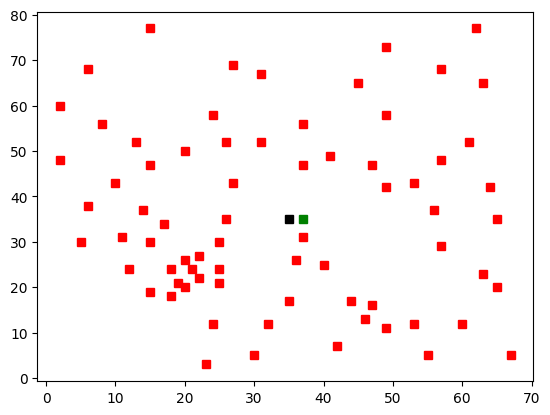

In [4]:
# Affichage des differents clients sur un plan
def draw_graph():
    plt.plot(client_x(1), client_y(1), c='black', marker='s') #affichage du depart
    for k in range(2, n): 
        plt.plot(client_x(k), client_y(k), c='r', marker='s') #affichage de tous les clients (sans le depart et l'arrivée)
    plt.plot(client_x(n), client_y(n), c='g', marker='s') #affichage de l'arrivée

draw_graph()

# Variables du TOP



In [5]:
m=5 # Nombre de vehicule dans la flotte
Tmax=10 # Temps de parcours maximal pour chaque vehicule
Sp=15 # La vitesse à laquelle roule tous les vehicules

F = range(1, m+1) # Enumeration des véhicules

print(f"""
{m=}
{Tmax=}
{Sp=}
""")


m=5
Tmax=10
Sp=15



### Ensembles clients

In [6]:
# les differents clients, depart et arrivee
V_=[i for i in range(2,n)] #Les clients sans les depart et arrivée
V_d=[1]+V_ # les differents clients, plus le depart. 
V_a=V_+[n] # Les differents clients, plus l'arrivée
V=[1]+V_ +[n] # Les differents clients, plus le depart et et l'arrivée 

print(f"""
d=1
a={n}
{V=}
""")


d=1
a=74
V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]



### Ensemble des arcs

In [7]:
E=[(i,j) for i in V for j in V if i!=j ]
E[:20] # Limite l'affichage à 20 éléments

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21)]

### Distances de parcours des arcs



In [8]:
# Fonction pour limiter l'affichage d'un dictionnaire
def limite_affichage(D:dict, limit):
    for cle, valeur in list(D.items())[:limit]:
        print(f"{cle}: {valeur}")

In [9]:
# Les distances entre les differents clients
D={(i,j):np.hypot(client_x(i)-client_x(j), client_y(i)-client_y(j)) for i,j in E}

In [10]:
# La distance entre le depart et le client 1
D[(1,2)]

20.615528128088304

In [11]:
# Affichage des distances 
limite_affichage(D, limit=20)

(1, 2): 20.615528128088304
(1, 3): 36.05551275463989
(1, 4): 17.46424919657298
(1, 5): 33.97057550292606
(1, 6): 34.20526275297414
(1, 7): 27.80287754891569
(1, 8): 43.93176527297759
(1, 9): 17.804493814764857
(1, 10): 29.154759474226502
(1, 11): 16.97056274847714
(1, 12): 4.47213595499958
(1, 13): 22.80350850198276
(1, 14): 9.055385138137417
(1, 15): 25.495097567963924
(1, 16): 25.495097567963924
(1, 17): 49.92995093127971
(1, 18): 40.496913462633174
(1, 19): 43.86342439892262
(1, 20): 39.66106403010388
(1, 21): 22.47220505424423


### Durée de parcours des arcs

In [12]:
T={(i,j):D[(i,j)]/Sp for i,j in E} # Le temps que met un vehicule pour aller d'un client i vers j

In [13]:
# Affichage des temps de parcours
limite_affichage(T, limit=20)

(1, 2): 1.3743685418725535
(1, 3): 2.4037008503093262
(1, 4): 1.164283279771532
(1, 5): 2.264705033528404
(1, 6): 2.280350850198276
(1, 7): 1.8535251699277127
(1, 8): 2.9287843515318395
(1, 9): 1.1869662543176571
(1, 10): 1.9436506316151
(1, 11): 1.131370849898476
(1, 12): 0.29814239699997197
(1, 13): 1.5202339001321838
(1, 14): 0.6036923425424945
(1, 15): 1.699673171197595
(1, 16): 1.699673171197595
(1, 17): 3.3286633954186473
(1, 18): 2.6997942308422114
(1, 19): 2.924228293261508
(1, 20): 2.6440709353402587
(1, 21): 1.498147003616282


### La somme de tous les profits 

In [14]:
profit_max_possibles = lambda list_P : sum(list_P)
        
max_profit = profit_max_possibles(list_P)
max_profit

900

### Tri des clients par profits importants(de maniere decroissante)

In [15]:
clients_tries = sorted(V_, key=lambda client: P(client), reverse=True)
clients_tries[:20]

[7, 5, 8, 3, 9, 4, 6, 2, 18, 19, 21, 25, 29, 17, 30, 16, 13, 14, 22, 33]

In [16]:
len(clients_tries)

72

## L'algorithme principal (Clark & Wright )



### Resolution du TOP et affichage  suivant les profits importants, et Profits/(Temps Trajet) important

In [17]:
#Algo corrigé et amélioré utilisant l'heuristique client visitable avec la meilleur rentabilité (Profit/Temps trajet)
def resolution_TOP(b_heuristique_rentabilite=True, affichage=False):
    """
    b_heuristique_rentabilite = False => heuristique du plus grand profit disponible
    affichage: 
        -False : pas d'affichage
        -True  : affichage
        -detailled : affichage détaillé
    """
    detailled = (affichage == "detailled")
    
    H = clients_tries.copy() # On reccupere la liste des clients triés par profits importants et decroissants
    if detailled: print(H)
    trajets, duree_trajets, profit_trajets = {}, {}, {}

    # Profit de départ
    profit = 0 
    
    for m in F:
        d,a = 1,n
        trajet = []
        duree_trajet = 0
        profit_trajet = 0
        dernier_client_visite = d
        while True:
            if b_heuristique_rentabilite : H = sorted(H, key=lambda x:P(x) / T[dernier_client_visite, x], reverse=True) # Heuristique Profit / Temps trajet
            for client in H :
                if duree_trajet + T[dernier_client_visite, client] + T[client, n] <= Tmax:
                    trajet.append(client)
                    duree_trajet += T[dernier_client_visite, client]
                    profit_trajet += P(client)
                    if detailled : print("Le profit du vehicule", m,"apres avoir visité le client", client, "est", profit_trajet)
                    dernier_client_visite = client  
                    H.remove(client)
                    break
                else:
                    if detailled : print("Le client", client, "ne peut pas être parcouru par le vehicule", m)
            if not(H) or client==H[-1]: break # Tous les clients sont ajoutés ou on n'a pu ajouter tous les clients

        trajets[m] = trajet
        duree_trajets[m] = duree_trajet + T[dernier_client_visite, n]
        profit_trajets[m] = profit_trajet
        profit += profit_trajet
        if detailled : print()
        if affichage : print("La solution pour le  vehicule", m, " est", [d] + trajet + [a])
        if detailled : print("Profit actuel:", profit)
        if detailled : print("les clients que vont potentiellement parcourir les autres vehicules sont:", H)
        if affichage : print()

    if affichage : print("Le profit total recueilli par tous les vehicules est", profit, "sur", max_profit, "possibles")
    return trajets, {"duree_trajets":duree_trajets, "profit_trajets":profit_trajets, "profit_total":profit, "clients_non_deservis":H}

#### Resolution du TOP suivant les profits importants

In [18]:
sol1 = resolution_TOP(b_heuristique_rentabilite=False, affichage=True)

La solution pour le  vehicule 1  est [1, 7, 5, 3, 21, 13, 74]

La solution pour le  vehicule 2  est [1, 8, 9, 4, 28, 74]

La solution pour le  vehicule 3  est [1, 6, 2, 25, 14, 12, 74]

La solution pour le  vehicule 4  est [1, 18, 29, 30, 33, 32, 31, 36, 74]

La solution pour le  vehicule 5  est [1, 19, 16, 34, 61, 74]

Le profit total recueilli par tous les vehicules est 517 sur 900 possibles


#### Resolution du TOP suivant les Profits/Temps Trajet important

In [19]:
sol2 = resolution_TOP(b_heuristique_rentabilite=True, affichage=True)

La solution pour le  vehicule 1  est [1, 12, 14, 48, 21, 22, 3, 5, 19, 13, 25, 24, 23, 11, 34, 61, 74]

La solution pour le  vehicule 2  est [1, 28, 9, 29, 2, 15, 33, 72, 47, 30, 32, 31, 73, 7, 6, 26, 4, 74]

La solution pour le  vehicule 3  est [1, 54, 16, 8, 60, 18, 20, 53, 62, 74]

La solution pour le  vehicule 4  est [1, 10, 38, 27, 67, 58, 68, 37, 59, 69, 74]

La solution pour le  vehicule 5  est [1, 63, 64, 56, 43, 55, 44, 66, 42, 35, 74]

Le profit total recueilli par tous les vehicules est 814 sur 900 possibles


## informations détaillées sur les parcours et visites des vehicules



### Temps, distance et profit d'un trajet 

In [20]:
# Permet de calculer le Temps ou la distance d'un trajet,  X=D pour la distance et X=T pour le temps
def calc_X_trajet(X:dict, trajet): # Trajet n'inclus pas le départ et l'arrivée
    total = 0
    d, a = 1, n # Départ, arrivé
    client_precedent = d
    trajet_a = trajet + [a]
    for client in trajet_a:
         total += X[client_precedent, client]
         client_precedent = client
    return total

# Permet de calculer le profit d'un trajet
def calc_profit_trajet(trajet):
    profit = 0
    for client in trajet:
        profit += P(client)
    return profit

### Informations sur les trajets

In [21]:
def infos_trajets(trajets, dict={}):
    duree_trajets = dict.get('duree_trajets', {i: calc_X_trajet(T, trajet) for i, trajet in trajets.items()})
    profit_trajets = dict.get('profit_trajets', {i: calc_profit_trajet(trajet) for i, trajet in trajets.items()})
    profit_total = dict.get('profit_total', sum(profit_trajets.values()))
    clients_non_deservis = dict.get('clients_non_deservis', list(set(V_) - set().union(*(set(t) for t in trajets.values()))))

    print("Profit total:", profit_total)
    print("Clients non desservis:", clients_non_deservis)
    print()

    for i in range(1, len(trajets) + 1):
        trajet = trajets[i]
        print("Le trajet du véhicule", i, "est:")
        print(trajet)
        print("Profit:", profit_trajets[i])
        print("Durée:", duree_trajets[i])
        print()

#### Informations sur les trajets des vehicules (suivant :plus grand Profit )

In [22]:
infos_trajets(*sol1) # Heuristique : plus grand Profit

Profit total: 517
Clients non desservis: [17, 22, 10, 26, 20, 24, 11, 15, 23, 27, 53, 59, 72, 38, 41, 44, 48, 54, 60, 63, 68, 73, 39, 45, 47, 64, 35, 51, 57, 67, 43, 56, 66, 37, 46, 49, 50, 62, 42, 58, 65, 69, 40, 55, 71, 52, 70]

Le trajet du véhicule 1 est:
[7, 5, 3, 21, 13]
Profit: 139
Durée: 9.933706820413965

Le trajet du véhicule 2 est:
[8, 9, 4, 28]
Profit: 100
Durée: 9.924700340730785

Le trajet du véhicule 3 est:
[6, 2, 25, 14, 12]
Profit: 108
Durée: 9.755903839260935

Le trajet du véhicule 4 est:
[18, 29, 30, 33, 32, 31, 36]
Profit: 110
Durée: 9.751055446847037

Le trajet du véhicule 5 est:
[19, 16, 34, 61]
Profit: 60
Durée: 9.854699102573319



#### Informations sur les trajets des vehicules (suivant :plus grand Profit )

In [23]:
infos_trajets(*sol2)  # Heuristique : plus grande rentabilité

Profit total: 814
Clients non desservis: [57, 39, 50, 49, 51, 17, 41, 36, 45, 71, 46, 65, 40, 70, 52]

Le trajet du véhicule 1 est:
[12, 14, 48, 21, 22, 3, 5, 19, 13, 25, 24, 23, 11, 34, 61]
Profit: 266
Durée: 9.411757845050008

Le trajet du véhicule 2 est:
[28, 9, 29, 2, 15, 33, 72, 47, 30, 32, 31, 73, 7, 6, 26, 4]
Profit: 297
Durée: 9.895342406564152

Le trajet du véhicule 3 est:
[54, 16, 8, 60, 18, 20, 53, 62]
Profit: 122
Durée: 9.971345972524073

Le trajet du véhicule 4 est:
[10, 38, 27, 67, 58, 68, 37, 59, 69]
Profit: 73
Durée: 9.327519674929102

Le trajet du véhicule 5 est:
[63, 64, 56, 43, 55, 44, 66, 42, 35]
Profit: 56
Durée: 9.364791784454646



### Dessin et affichage graphique orienté des trajets 

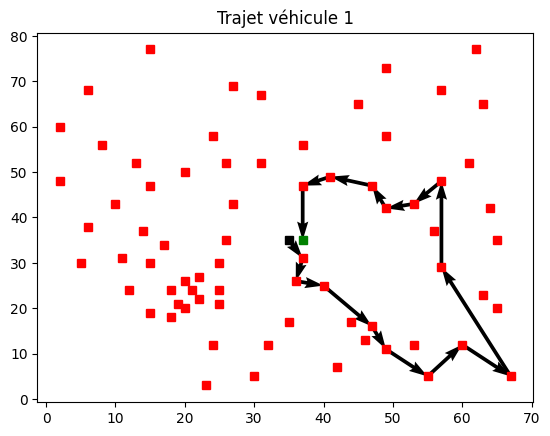

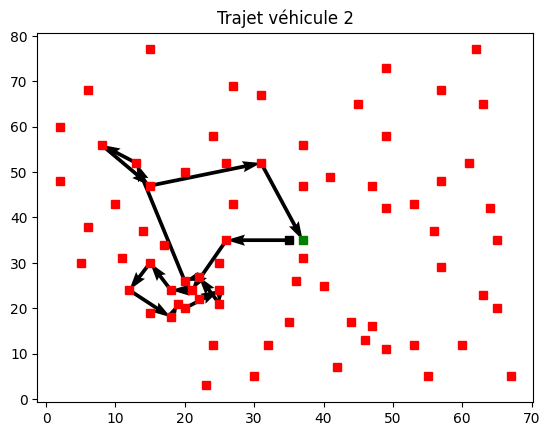

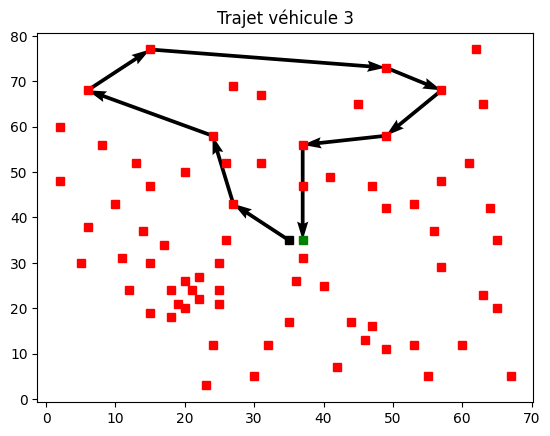

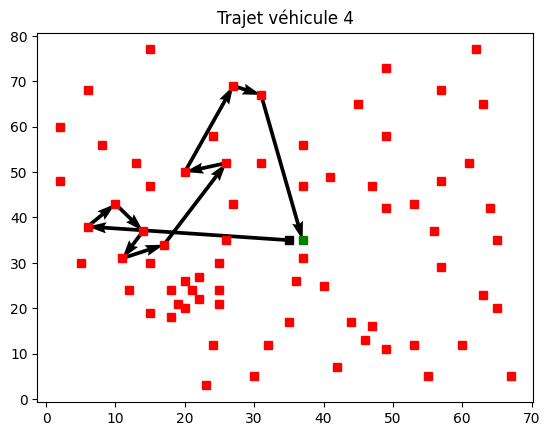

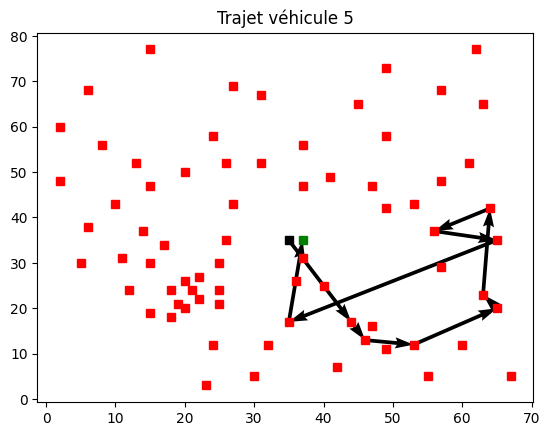

In [24]:
def dessiner_trajet(trajet, color='black'):
    d, a = 1, n  # Départ, arrivé

    # Affichage des trajets
    client_precedent = d
    for client in trajet:
        plt.quiver(client_x(client_precedent),
                   client_y(client_precedent),
                   client_x(client) - client_x(client_precedent),
                   client_y(client) - client_y(client_precedent),
                   angles='xy',
                   scale_units='xy',
                   scale=1,
                   color=color)
        client_precedent = client
    plt.quiver(client_x(client_precedent),
               client_y(client_precedent),
               client_x(a) - client_x(client_precedent),
               client_y(a) - client_y(client_precedent),
               angles='xy',
               scale_units='xy',
               scale=1,
               color=color)

def dessiner_trajets(trajets, b_meme_graphe=False):
    if b_meme_graphe:
        draw_graph()
        cmap = plt.colormaps['tab10']  # Vous pouvez choisir une autre colormap si vous souhaitez
        colors = cmap.colors[:m]
    else:
        colors = ['black']*m
    for i in F:
        if not b_meme_graphe:
            plt.figure()  # Nouvelle figure
            plt.title(f"Trajet véhicule {i}")
            draw_graph()
        dessiner_trajet(trajets[i], colors[i-1])
        
trajets = sol2[0]
dessiner_trajets(trajets)

## L'algorithme de Clark & Wright avec optimisation 2opt



### Algorithme du 2-opt

In [25]:
# 2 opt pour le trajet 1
def algo_2opt(trajet, draw_each_n_update = float("inf")):
    clients = [1] + trajet + [n]
    l = len(clients)
    improved = True
    update = 0
    nouveau_trajet = trajet.copy()
    
    while improved:
        improved = False
        for i in range(0, l-1):
            for j in range(i+1, l-1): 
                cur_time = T[ clients[i], clients[i+1] ] + T[ clients[j], clients[j+1] ]
                new_time = T[ clients[i], clients[j] ] + T[ clients[i+1], clients[j+1] ]
                if new_time < cur_time:
                    txt=f"Echange {clients[i], clients[i+1]} {clients[j], clients[j+1]} avec {clients[i], clients[j]} {clients[i+1], clients[j+1]}"
                    clients[i+1:j+1] = clients[i+1:j+1][::-1]
                    improved = True
                    nouveau_trajet = clients[1:-1] # on enlève le départ et l'arrivée
                    # Dessin du nouveau trajet
                    update += 1
                    if update%draw_each_n_update == 0:
                          plt.figure()
                          draw_graph()
                          dessiner_trajet(nouveau_trajet)
                          plt.title(f"{txt}, {clients}")
    return nouveau_trajet

#### Exemple d'utilisation de l'algo 2opt

[4, 8, 6, 7, 2, 9, 3, 5, 21]

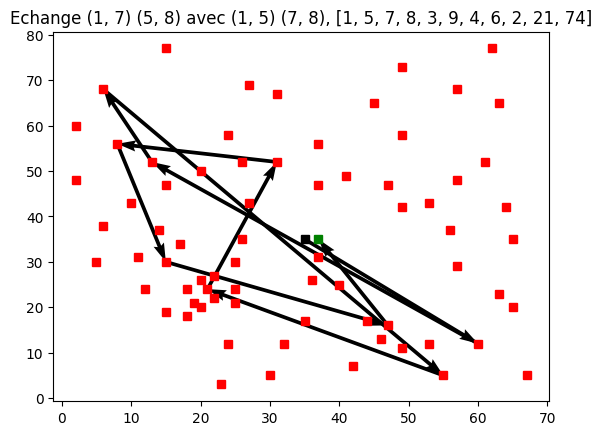

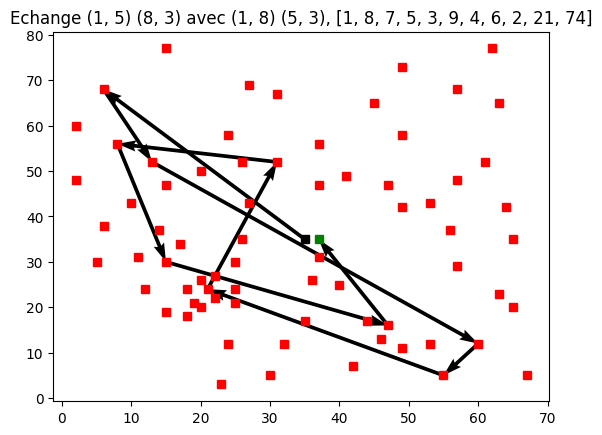

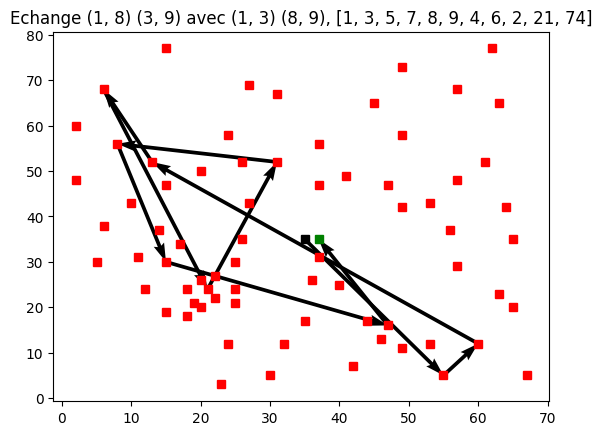

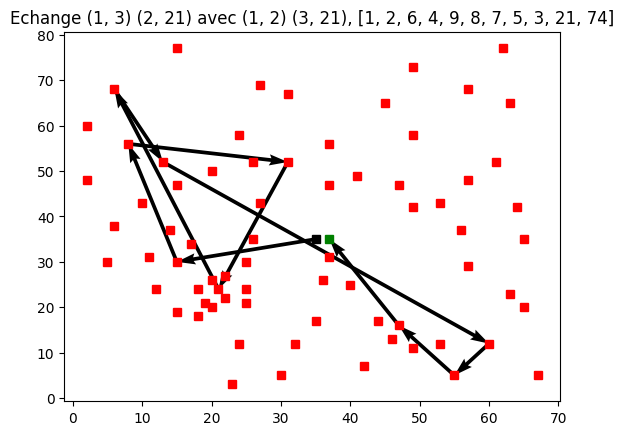

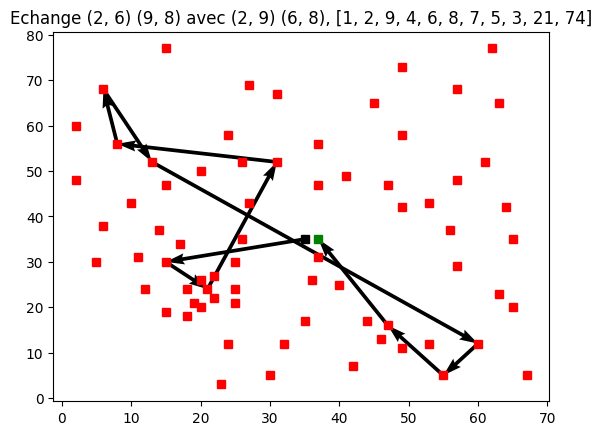

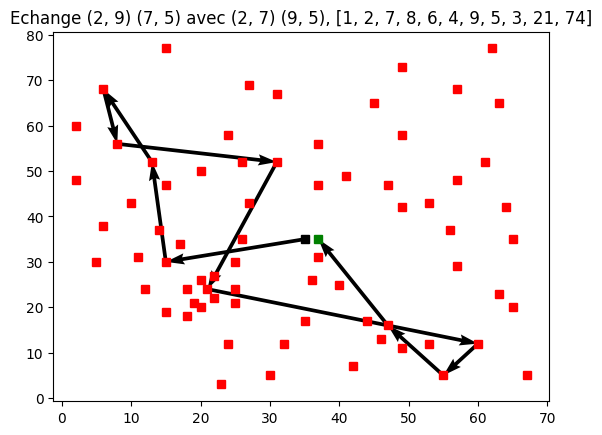

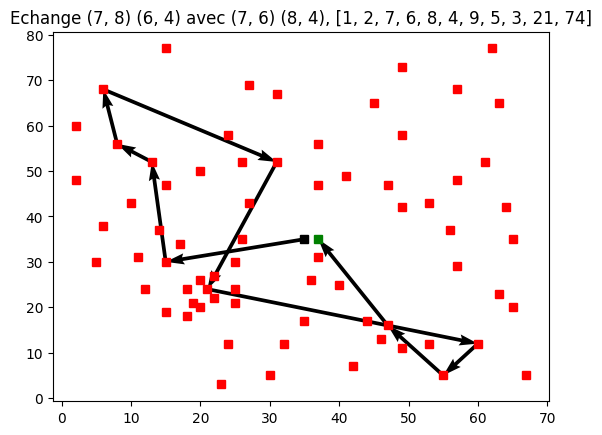

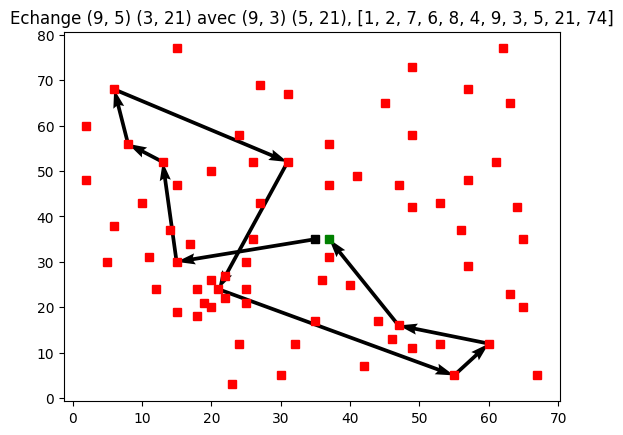

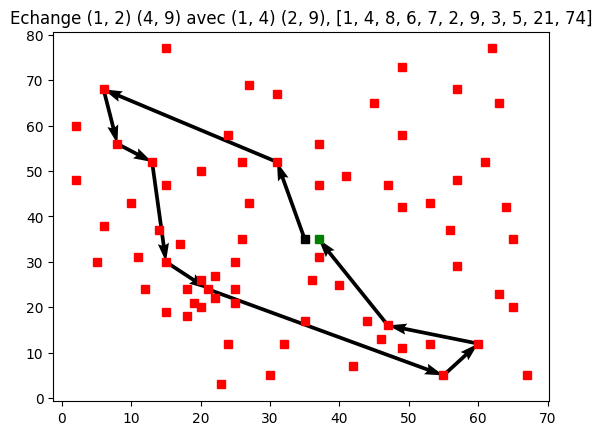

In [26]:
trajet = [7, 5, 8, 3, 9, 4, 6, 2, 21]
algo_2opt(trajet, 1) 

### Utilisation du 2-opt sur les trajets solutions obtenus plus-haut

In [27]:
def resolution_TOP_2opt(b_heuristique_rentabilite=True, affichage=False):
    """
    b_heuristique_rentabilite = False => heursitique du plus grand profit disponible
    affichage: 
        -False : pas d'affichage
        -True  : affichage
        -detailled : affichage détaillé
    """
    detailled = (affichage == "detailled")
    
    H = clients_tries.copy() # On reccupere la liste des clients triés par profits importants et decroissants
    if detailled: print(H)
    trajets, duree_trajets, profit_trajets = {}, {}, {}

    # Profit de départ
    profit = 0 
    duree_trajet_sans_client = calc_X_trajet(T,[])
    for m in F:
        d,a = 1,n
        trajet=[]
        profit_trajet = 0
        duree_trajet = duree_trajet_sans_client
        dernier_client_visite = d
        while True:
            if b_heuristique_rentabilite : H = sorted(H, key=lambda x:P(x) / T[dernier_client_visite, x], reverse=True) # Heuristique Profit / Temps trajet
            for client in H :
                temp_trajet = algo_2opt(trajet+[client])
                temp_duree_trajet = calc_X_trajet(T, temp_trajet)
                if temp_duree_trajet <= Tmax:
                    duree_trajet = temp_duree_trajet
                    trajet = temp_trajet
                    profit_trajet += P(client)
                    if detailled : print("Le profit du vehicule", m,"apres avoir visité le client", client, "est", profit_trajet)
                    H.remove(client)
                    dernier_client_visite = client
                    break
                else:
                    if detailled : print("Le client", client, "ne peut pas être parcouru par le vehicule", m)
            if not(H) or H[-1]==client: break

        trajets[m] = trajet
        duree_trajets[m] = duree_trajet
        profit_trajets[m] = profit_trajet
        profit += profit_trajet
        if detailled : print()
        if affichage : print("La solution pour le  vehicule", m, " est", [d] + trajet + [a])
        if detailled : print("Profit actuel:", profit)
        if detailled : print("les clients que vont potentiellement parcourir les autres vehicules sont:", H)
        if affichage : print()

    if affichage : print("Le profit total recueilli par tous les vehicules est", profit, "sur", max_profit, "possibles")
    return trajets, {"duree_trajets":duree_trajets, "profit_trajets":profit_trajets, "profit_total":profit, "clients_non_deservis":H}

### Utlisation du 2-opt sur les trajets solutions

In [28]:
sol_2opt1 = resolution_TOP_2opt(b_heuristique_rentabilite=False, affichage=False)
sol_2opt2 = resolution_TOP_2opt(b_heuristique_rentabilite=True, affichage=False)

### Informations sur les trajets (obtenue par l'heuristique:Profit maximum) optimisés par le 2_opt

In [29]:
infos_trajets(*sol_2opt1)

Profit total: 801
Clients non desservis: [63, 39, 45, 64, 35, 51, 57, 67, 43, 56, 46, 49, 50, 42, 65, 40, 55, 52]

Le trajet du véhicule 1 est:
[4, 68, 7, 27, 2, 29, 9, 32, 3, 5, 21]
Profit: 256
Durée: 9.996768243244846

Le trajet du véhicule 2 est:
[26, 6, 8, 16, 18, 20, 25, 23]
Profit: 168
Durée: 9.997568784578394

Le trajet du véhicule 3 est:
[28, 36, 31, 73, 15, 70, 33, 47, 72, 71, 30, 14, 48, 22, 19, 13, 12]
Profit: 211
Durée: 9.989854553378295

Le trajet du véhicule 4 est:
[58, 10, 38, 37, 62, 41, 17, 53, 11]
Profit: 90
Durée: 9.936180483317205

Le trajet du véhicule 5 est:
[54, 60, 59, 69, 61, 34, 24, 44, 66]
Profit: 76
Durée: 9.641135631472416



### Informations sur les trajets (obtenue par l'heuristique:Profit maximum) optimisés par le 2_opt

In [30]:
infos_trajets(*sol_2opt2)

Profit total: 887
Clients non desservis: [46, 49, 40, 52]

Le trajet du véhicule 1 est:
[4, 61, 34, 11, 23, 24, 25, 66, 13, 5, 19, 3, 22, 21, 63, 48, 14, 12]
Profit: 308
Durée: 9.963433060832106

Le trajet du véhicule 2 est:
[28, 26, 7, 8, 6, 38, 10, 67, 2, 15, 70, 33, 47, 72, 29, 9, 73, 31, 30, 32]
Profit: 333
Durée: 9.9223652413312

Le trajet du véhicule 3 est:
[54, 68, 16, 59, 69, 41, 18, 17, 45, 20, 53, 62]
Profit: 142
Durée: 9.59846595017795

Le trajet du véhicule 4 est:
[36, 58, 27, 71, 50, 51, 39, 57, 35, 64, 56, 43, 55]
Profit: 75
Durée: 9.763400969986964

Le trajet du véhicule 5 est:
[37, 60, 65, 44, 42]
Profit: 29
Durée: 9.76921324284654



### Dessin des trajets solution( suivant l'heuristique: Profit/(Temps Trajet)) optimisés par le 2-opt

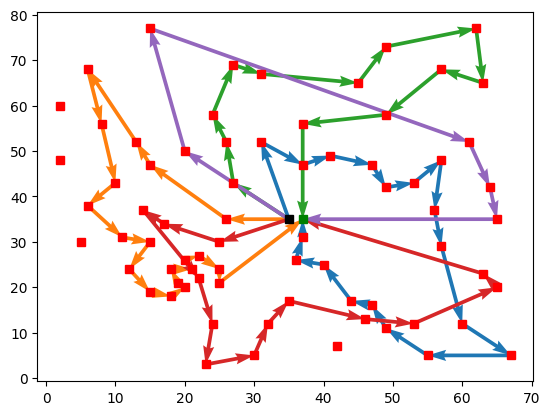

In [31]:
dessiner_trajets(sol_2opt2[0], b_meme_graphe=True)

## Recapitulatif des differentes heuristiques(profit maximum, profits/(Temps Trajets)); avec et sans l'optimisation du 2-opt

In [32]:
print(f"""
Sans utilisation de 2opt:
    Profit algo avec heuristique du profit maximum:          {sol1[1]["profit_total"]}
    Profit algo avec heuristique de la rentabilité maximale: {sol2[1]["profit_total"]}
    
Avec utilisation de 2opt:
    Profit algo avec heuristique du profit maximum:          {sol_2opt1[1]["profit_total"]}
    Profit algo avec heuristique de la rentabilité maximale: {sol_2opt2[1]["profit_total"]}
""")


Sans utilisation de 2opt:
    Profit algo avec heuristique du profit maximum:          517
    Profit algo avec heuristique de la rentabilité maximale: 814
    
Avec utilisation de 2opt:
    Profit algo avec heuristique du profit maximum:          801
    Profit algo avec heuristique de la rentabilité maximale: 887

